# MODELLING HOME CREDIT USING RANDOM FOREST

In [ ]:
# Import module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read data
application_train = pd.read_csv("/content/gdrive/MyDrive/Dataset/application_train.csv",index_col=0)
application_test = pd.read_csv("/content/gdrive/MyDrive/Dataset/application_test.csv",index_col=0)

In [ ]:
# See data
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# check unique value
application_train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(307511, 121)
(48744, 120)


In [ ]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocessing

In [ ]:
# application_train.columns

In [ ]:
# Preprocessing Menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
application_train['NAME_CONTRACT_TYPE'] = le.fit_transform(application_train['NAME_CONTRACT_TYPE'])
application_test['CODE_GENDER'] = le.fit_transform(application_test['CODE_GENDER'])
application_train['FLAG_OWN_CAR'] = le.fit_transform(application_train['FLAG_OWN_CAR'])
application_train['FLAG_OWN_REALTY'] = le.fit_transform(application_train['FLAG_OWN_REALTY'])

application_test['NAME_CONTRACT_TYPE'] = le.fit_transform(application_test['NAME_CONTRACT_TYPE'])
application_test['CODE_GENDER'] = le.fit_transform(application_test['CODE_GENDER'])
application_test['FLAG_OWN_CAR'] = le.fit_transform(application_test['FLAG_OWN_CAR'])
application_test['FLAG_OWN_REALTY'] = le.fit_transform(application_test['FLAG_OWN_REALTY'])



In [ ]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menggunakan get dummies
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

In [ ]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,1,0,1,0
100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,1,0,0,0,0,0,0,1,0
100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Melihat perbedaan kolom antara application train dan application test
col_train = set(application_train.columns)
col_test = set(application_test.columns)

exc_col = col_train-col_test
exc_col

{'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

In [ ]:
# Memisah Target dan meng-align data dari application_train, application_test
train_target_labels = application_train['TARGET']
application_train_align,application_test_align = application_train.align(application_test,join='inner',axis=1)
application_train_align['TARGET'] = train_target_labels

In [ ]:
print(application_train.shape)
print(application_test.shape)
print(application_train_align.shape)
print(application_test_align.shape)

(307511, 242)
(48744, 237)
(307511, 237)
(48744, 236)


In [ ]:
train_labels = application_train_align.pop('TARGET')
feat_names = list(application_train_align.columns)
# feat_names
train_labels

SK_ID_CURR
100002    1
100003    0
100004    0
100006    0
100007    0
         ..
456251    0
456252    0
456253    0
456254    1
456255    0
Name: TARGET, Length: 307511, dtype: int64

In [ ]:
#menggunakan simpleimpute untuk menangani missing value
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')# menggunakan median

#dan menggunakan MinMaxScaler untuk menormalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [ ]:
train = application_train_align.copy()
test = application_test_align.copy()

In [ ]:
#penerapan  imputer & scaler
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(application_test_align)

scaler.fit(train)
train= scaler.transform(train)
test= scaler.transform(test)

## Modeling Using Random Forest

In [ ]:
# Modeling Random Forest dengan n_estimators 50 , random state 10, verbose 1 dan max_features 100
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,random_state=10,verbose=1,n_jobs=-1,max_features=100)

In [ ]:
#Train data
rf.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.0min finished


RandomForestClassifier(max_features=100, n_estimators=50, n_jobs=-1,
                       random_state=10, verbose=1)

In [ ]:
# y_train

In [ ]:
# Membuat fungsi untuk menampilkan top 10 features dan bad feature
def plot_feat_importance(df,numFeat=10):

    df = df.sort_values('Importance',ascending=False).reset_index()
    top_feat = df.head(numFeat)
    bottom_feat = df.tail(numFeat)

    fig,axes = plt.subplots(1,2,figsize=(15,10))
    ax0 = sns.barplot(x='Feature',y='Importance',data=top_feat, ax=axes[0])
    ax0.set_title('Top {} features'.format(numFeat))
    for item in ax0.get_xticklabels():
        item.set_rotation(90)
    ax1 = sns.barplot(x='Feature',y='Importance',data=bottom_feat, ax=axes[1])
    for item in ax1.get_xticklabels():
        item.set_rotation(90)
    ax1.set_title('Bottom {} features'.format(numFeat))

    return

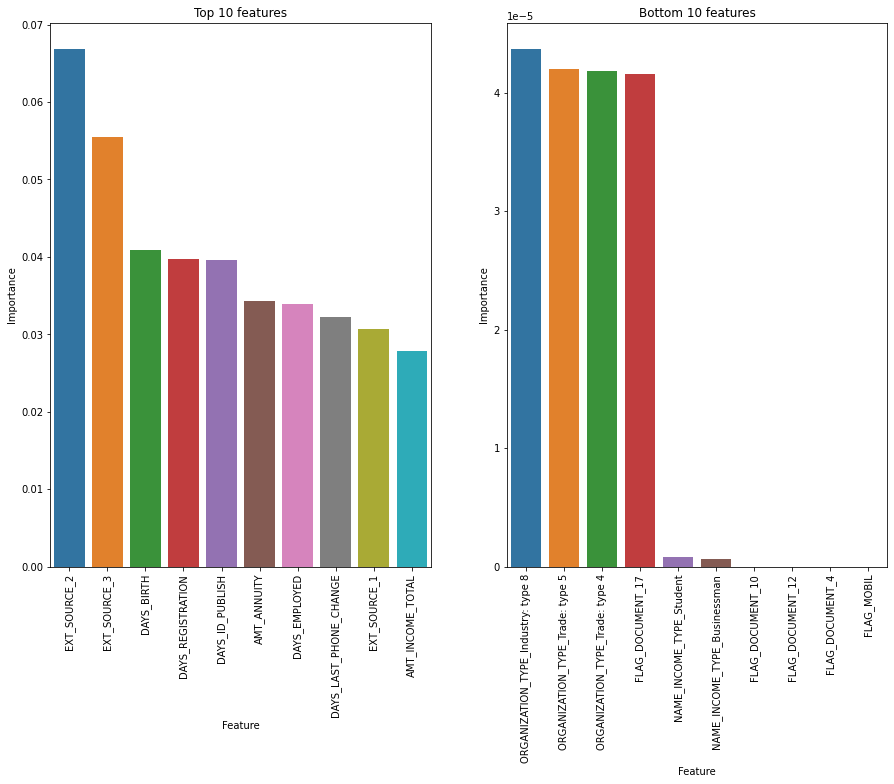

In [ ]:
# Mencari feature importance
# membuat dataframe dan menampilkan gambar
yangpenting = rf.feature_importances_
important_feature=pd.DataFrame({'Feature':feat_names,'Importance': yangpenting})
plot_feat_importance(important_feature)
plt.show()

In [ ]:
# Prediksi dengan probabilitas 
rf_pred = rf.predict_proba(test)[:,1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.3s finished


In [ ]:
# Hasil akhir akhir
submit = pd.DataFrame()
submit['SK_ID_CURR'] = application_test_align.index
submit['TARGET'] = rf_pred
print(submit.head())
print(submit.shape)

   SK_ID_CURR  TARGET
0      100001    0.02
1      100005    0.04
2      100013    0.02
3      100028    0.08
4      100038    0.18
(48744, 2)


### EVALUATION

Data Evaluation Mengguanakan

In [ ]:
# Membuat dataframe prediksi kita dan menyeleksi 40.000 baris
rf_pred = pd.DataFrame(rf_pred)
rf_pred = rf_pred.head(40000)
rf_pred = round(rf_pred)
rf_pred.value_counts()

0.0    39928
1.0       72
dtype: int64

In [ ]:
# membuat data frame train_target_label
train_target_labels = pd.DataFrame(train_target_labels)
train_target_labels=train_target_labels.reset_index() # Menghilangkan index
train_target_labels = train_target_labels.drop(columns='SK_ID_CURR',axis=1) # Drop column sk_id_cur
train_target_labels.head().shape

(5, 1)

In [ ]:
train_target_labels.head()

,TARGET
0,1
1,0
2,0
3,0
4,0


In [ ]:
#Drop columns dan seleksi 40.000 baris
# train_target_labels = train_target_labels.drop(columns=['level_0','index'],axis=1) # Drop column level_0, index
train_target_labels = train_target_labels.head(40000)

In [ ]:
train_target_labels.value_counts()

TARGET
0         36769
1          3231
dtype: int64

In [ ]:
rf_pred.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
# Evaluation Using accuracy score ,
from sklearn import metrics as m
print('                   Evaluation Score                ')
print('---------------------------------------------------')
print(f'Score Akurasi : {m.accuracy_score(train_target_labels,rf_pred)}')
print(f'Nilai Confusion Matrix : {m.confusion_matrix(train_target_labels,rf_pred)}')
print(f'Classification Report :{m.classification_report(train_target_labels,rf_pred)})')

                   Evaluation Score                
---------------------------------------------------
Score Akurasi : 0.917675
Nilai Confusion Matrix : [[36702    67]
 [ 3226     5]]
Classification Report :              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36769
           1       0.07      0.00      0.00      3231

    accuracy                           0.92     40000
   macro avg       0.49      0.50      0.48     40000
weighted avg       0.85      0.92      0.88     40000
)
